In [1]:
# using datetime module 
import datetime; 
  
# ct stores current time 
ct = datetime.datetime.now() 
print("current time:-", ct) 
  
# ts store timestamp of current time 
ts = ct.timestamp() 
print("timestamp:-", ts) 

current time:- 2021-07-26 01:44:42.284978
timestamp:- 1627244082.284978


In [2]:
print("Vaishnavi Shinde")
print("1132200485")

Vaishnavi Shinde
1132200485


In [3]:
from scipy.sparse import coo_matrix
from sklearn.utils import resample
#import libraries

#NUmber crunching
import pandas as pd
import numpy as np

#Plots and graphs
import matplotlib.pyplot as plt  
import seaborn as sns

#Model building
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
#Pre-processing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


#Plots and graphs
import matplotlib.pyplot as plt  
import seaborn as sns

from sklearn.ensemble import IsolationForest
import statistics as stats
%matplotlib inline

In [4]:
%cd D:\NOTES\SEM 3\Lab On ML 2\Dataset

D:\NOTES\SEM 3\Lab On ML 2\Dataset


In [5]:
ds=pd.read_csv('HTRU_2.csv',names=["Mean of the integrated profile","Standard deviation","Excess kurtosis","Skewness","Mean DM","Standard deviation DM","Excess kurtosis DM","Skewness DM","Class"])

{'whiskers': [<matplotlib.lines.Line2D at 0x27fcab52940>,
 'caps': [<matplotlib.lines.Line2D at 0x27fcab6c040>,
 'boxes': [<matplotlib.lines.Line2D at 0x27fcab525e0>,
 'medians': [<matplotlib.lines.Line2D at 0x27fcab6c700>,
 'fliers': [<matplotlib.lines.Line2D at 0x27fcab6ca60>,
 'means': []}

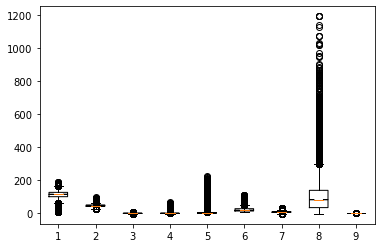

In [6]:
plt.boxplot(ds,'Class')

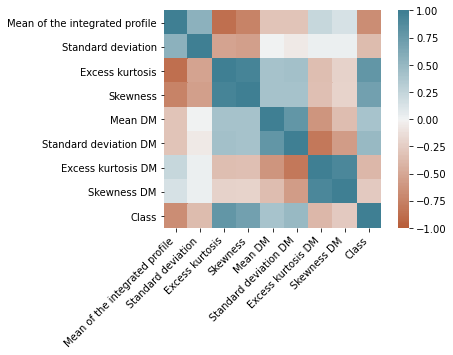

In [7]:
corr = ds.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(25, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

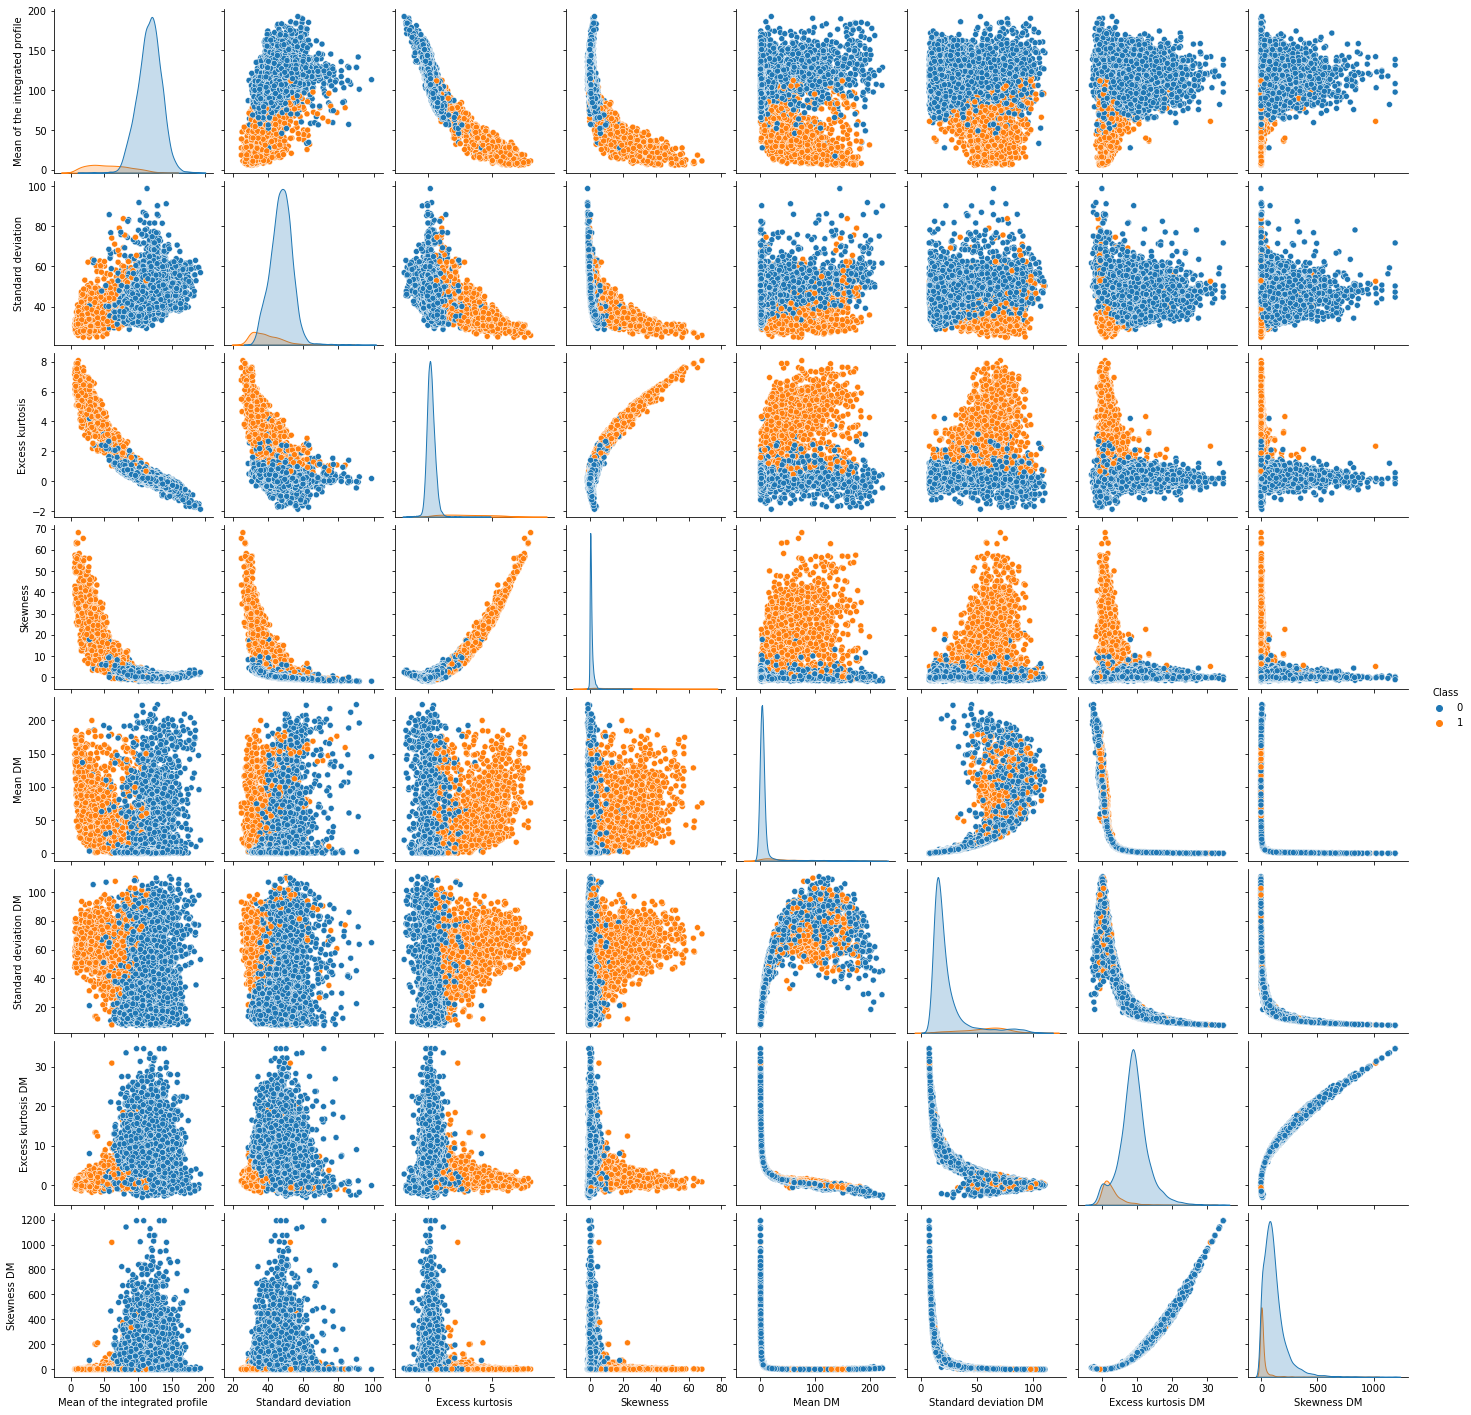

In [8]:
sns.pairplot(ds,hue='Class')

In [9]:
ds.shape

(17898, 9)

In [10]:
ds.head()

,Mean of the integrated profile,Standard deviation,Excess kurtosis,Skewness,Mean DM,Standard deviation DM,Excess kurtosis DM,Skewness DM,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [11]:
ds['Class'].value_counts()

0    16259
1     1639
Name: Class, dtype: int64

In [12]:
X=ds.drop('Class',axis=1)

In [13]:
y=ds['Class']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [15]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14318, 8), (3580, 8), (14318,), (3580,))

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14318, 8), (3580, 8), (14318,), (3580,))

In [17]:
clf = LogisticRegression(random_state=0).fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [18]:
y_pred = clf.predict(X_test)

In [19]:
clf.score(X_test, y_test)

0.9807262569832402

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[3250   15]
 [  54  261]]
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      3265
           1       0.95      0.83      0.88       315

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.94      3580
weighted avg       0.98      0.98      0.98      3580



In [21]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, clf.predict_proba(X)[:, 1])

0.9744314698976877

### Random Over Sampling

In [22]:
#
ds_majority=ds[ds.Class==0]
ds_minority=ds[ds.Class==1]

In [23]:
ds_majority.shape,ds_minority.shape

((16259, 9), (1639, 9))

In [24]:
#upsampling the minority class
ds_minority_upsampled=resample(ds_minority,replace=True,n_samples=16529,random_state=123)

In [25]:
ds_minority_upsampled['Class'].value_counts()

1    16529
Name: Class, dtype: int64

In [26]:
ds_minority_upsampled.shape

(16529, 9)

In [27]:
ds_upsampled=pd.concat([ds_majority,ds_minority_upsampled])

In [28]:
ds_upsampled.Class.value_counts()

1    16529
0    16259
Name: Class, dtype: int64

In [29]:
ds_upsampled.shape

(32788, 9)

In [30]:
Xup=ds_upsampled.drop('Class',axis=1)

In [31]:
yup=ds_upsampled['Class']

In [32]:
Xup.shape,yup.shape

((32788, 8), (32788,))

In [33]:
X_trainup, X_testup, y_trainup, y_testup = train_test_split(Xup, yup, test_size=0.2)

In [34]:
clf = LogisticRegression(random_state=0).fit(X_trainup, y_trainup)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
y_predup = clf.predict(X_testup)

In [36]:
clf.score(X_testup, y_testup)

0.9408356206160414

In [37]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_testup, y_predup))
print(classification_report(y_testup, y_predup))

[[3165   93]
 [ 295 3005]]
              precision    recall  f1-score   support

           0       0.91      0.97      0.94      3258
           1       0.97      0.91      0.94      3300

    accuracy                           0.94      6558
   macro avg       0.94      0.94      0.94      6558
weighted avg       0.94      0.94      0.94      6558



In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(yup, clf.predict_proba(Xup)[:, 1])

0.9767919152181025

## Random undersampling

In [39]:
#downsampling the majority class
ds_majority_downsampled=resample(ds_majority,replace=False,n_samples=1639,random_state=123)

In [40]:
ds_majority_downsampled.shape

(1639, 9)

In [41]:
ds_downsampled=pd.concat([ds_majority_downsampled,ds_minority])

In [42]:
ds_downsampled.Class.value_counts()

0    1639
1    1639
Name: Class, dtype: int64

In [43]:
ds_downsampled.shape

(3278, 9)

In [44]:
Xdown=ds_downsampled.drop('Class',axis=1)

In [45]:
ydown=ds_downsampled['Class']

In [46]:
Xdown.shape,ydown.shape

((3278, 8), (3278,))

In [47]:
X_traindown, X_testdown, y_traindown, y_testdown = train_test_split(Xdown, ydown, test_size=0.2)

In [48]:
clf = LogisticRegression(random_state=0).fit(X_traindown, y_traindown)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [49]:
y_preddown = clf.predict(X_testdown)

In [50]:
clf.score(X_testdown, y_testdown)

0.948170731707317

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_testdown, y_preddown))
print(classification_report(y_testdown, y_preddown))

[[325   8]
 [ 26 297]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       333
           1       0.97      0.92      0.95       323

    accuracy                           0.95       656
   macro avg       0.95      0.95      0.95       656
weighted avg       0.95      0.95      0.95       656



In [52]:
roc_auc_score(ydown, clf.predict_proba(Xdown)[:, 1])

0.9772588607243885

## SMOTE

In [53]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Asus\anaconda3

  added / updated specs:
    - imbalanced-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.10.3               |   py38haa244fe_0         3.1 MB  conda-forge
    imbalanced-learn-0.8.0     |     pyhd8ed1ab_0         109 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         3.2 MB

The following NEW packages will be INSTALLED:

  imbalanced-learn   conda-forge/noarch::imbalanced-learn-0.8.0-pyhd8ed1ab_0
  python_abi         conda-forge/win-64::python_abi-3.8-2_cp38

The following packages will be UPDATED:

  conda              pkgs/main::conda-4.10.1-py38haa95532_1 --> conda-forge::conda-4.10.3-py38haa244fe



==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 4.10.3

Please update conda by running

    $ conda update -n base -c defaults conda




In [54]:
conda install -c glemaitre imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [55]:
X=ds.drop('Class',axis=1)

In [56]:
X.shape

(17898, 8)

In [57]:
y=ds['Class']

In [58]:
y.shape

(17898,)

In [59]:
X.shape,y.shape

((17898, 8), (17898,))

In [60]:
from imblearn.over_sampling import SMOTE
oversample=SMOTE()
Xs, ys =oversample.fit_resample (X,y)

In [61]:
Xs.shape,ys.shape

((32518, 8), (32518,))

In [62]:
X_train, X_test, y_train, y_test = train_test_split(Xs, ys, test_size=0.20)

In [63]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((26014, 8), (6504, 8), (26014,), (6504,))

In [64]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
clf = LogisticRegression(random_state=0).fit(X_train, y_train)
clf = clf.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

In [65]:
y_predsm = clf.predict(X_test)

In [66]:
y_predsm.shape

(6504,)

In [67]:
clf.score(X_test,y_test)

0.9398831488314883

In [68]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_predsm))

[[3170  113]
 [ 278 2943]]


In [69]:
print(classification_report(y_test, y_predsm))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      3283
           1       0.96      0.91      0.94      3221

    accuracy                           0.94      6504
   macro avg       0.94      0.94      0.94      6504
weighted avg       0.94      0.94      0.94      6504



In [70]:
clf.predict_proba(X_test)

array([[0.00934015, 0.99065985],
       [0.99279085, 0.00720915],
       [0.00108175, 0.99891825],
       ...,
       [0.98100543, 0.01899457],
       [0.88129413, 0.11870587],
       [0.18462776, 0.81537224]])

In [71]:
roc_auc_score(ys, clf.predict_proba(Xs)[:, 1])

0.9776238270979176

#### From above analysis we can see that the accuracy for imbalanced dataset is more as compared to balance dataset accuracy for imbalanced dataset is 0.98 whereas comparing balanced dataset we have 0.94 with SMOTE ,0.96 with RUS,0.95 with ROS. And comparing the roc_auc_score that we got from imbalanced dataset is 0.97 and 0.98 for SMOTE,RUS,ROS balanced dataset

In [73]:
#----------------------Unbalanced DS|----------------Balanced DS----------------------------
#                                   |      ROS      |  RUS        | SMOTE
#-----------------------------------|---------------|-------------|-------------------------
#accuracy                       0.98|     0.95      |  0.96       |   0.94
# roc_auc_score                 0.97|     0.98      |  0.98       |   0.98
# using datetime module 


In [74]:
import datetime; 
  
# ct stores current time 
ct = datetime.datetime.now() 
print("current time:-", ct) 
  
# ts store timestamp of current time 
ts = ct.timestamp() 
print("timestamp:-", ts) 

current time:- 2021-07-26 01:53:36.720527
timestamp:- 1627244616.720527
